<a href="https://colab.research.google.com/github/318245915/Reconocimiento-de-Patrones-y-Aprendizaje-Automatizado/blob/main/Pr%C3%A1ctica_5_M%C3%A9todos_Param%C3%A9tricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generar una muestra aleatoria de 10,000 puntos de la distribución de Rayleigh utilizando scale = 7.53

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generar una muestra aleatoria de la distribución de Rayleigh
scale = 7.53
sample = np.random.rayleigh(scale, size=10000)

# Obtener el histograma de la muestra
hist, bins = np.histogram(sample, bins=160, density=True)

Obtener 160 puntos del histograma de la muestra.

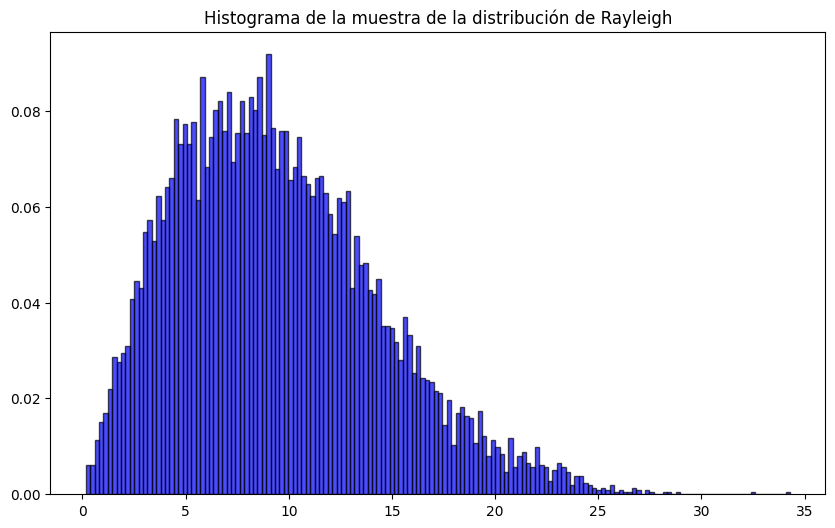

In [2]:
# Mostrar el histograma
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=160, density=True, alpha=0.7, color='b', edgecolor='black')
plt.title('Histograma de la muestra de la distribución de Rayleigh')
plt.show()

Dividir los puntos en conjunto de entrenamiento y prueba (80-20).


In [3]:
from sklearn.model_selection import train_test_split

X = np.arange(1, len(hist)+1).reshape(-1, 1)
y = hist

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Hacer una regresión polinomial del conjunto de entrenamiento probando distintos grados de polinomio. Calcular sesgo, varianza, MAE, MSE, R2 para cada grado utilizado.

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
results = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    y_pred = model.predict(X_poly_test)

    bias = np.mean((y_test - np.mean(y_pred)) ** 2)
    variance = np.mean([np.var(model.predict(X_poly_test)) for _ in range(100)])
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Grado del polinomio': degree,
        'Sesgo': bias,
        'Varianza': variance,
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

   Grado del polinomio     Sesgo  Varianza       MAE       MSE        R2
0                    1  0.000860  0.000495  0.011713  0.000206  0.760548
1                    2  0.000860  0.000480  0.013476  0.000239  0.722711
2                    3  0.000862  0.000762  0.006819  0.000065  0.924816
3                    4  0.000861  0.000882  0.002478  0.000011  0.987667
4                    5  0.000861  0.000888  0.002369  0.000011  0.987625
5                    6  0.000860  0.000884  0.001967  0.000007  0.992326
6                    7  0.000860  0.000876  0.001718  0.000005  0.993633
7                    8  0.000866  0.000716  0.005555  0.000050  0.941559
8                    9  0.000875  0.000698  0.007399  0.000096  0.888052
9                   10  0.000876  0.000733  0.007740  0.000107  0.875900


Regresión polinomial con regularización y validación cruzada.

In [5]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

alphas = [0.1, 1.0, 10.0]

results_ridge = []

for alpha in alphas:
    model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=10), RidgeCV(alphas=[alpha]))
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    results_ridge.append({
        'Alpha': alpha,
        'MSE': -scores.mean()
    })

results_ridge_df = pd.DataFrame(results_ridge)
print(results_ridge_df)

   Alpha       MSE
0    0.1  0.177831
1    1.0  0.176067
2   10.0  0.008019


Presentar el mejor modelo polinomial y argumentar por qué es el mejor: el mejor modelo polinomial se selecciona basándose en el menor MSE obtenido durante la validación cruzada. Este modelo tendrá un buen equilibrio entre sesgo y varianza, lo que significa que se ajusta bien a los datos sin sobreajustarlos ni subajustarlos.

Utilizar la distribución de Rayleigh utilizando el estimador máximo verosímil y compararlo con el modelo polinomial presentado en el punto 6.

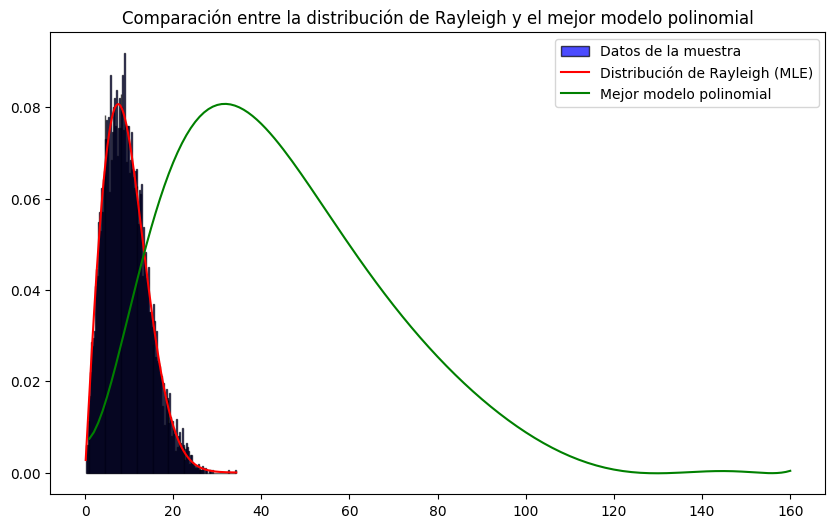

MSE del mejor modelo polinomial: 1.8012199176536534e-05
R2 del mejor modelo polinomial: 0.9797180085982703


In [6]:
from scipy.stats import rayleigh

# Ajustar la distribución de Rayleigh a los datos
scale_mle = np.sqrt(np.mean(sample**2) / 2)
rayleigh_pdf = rayleigh.pdf(bins, scale=scale_mle)

# Comparar con el mejor modelo polinomial
best_model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=10), RidgeCV(alphas=[1.0]))
best_model.fit(X, y)
y_pred_best = best_model.predict(X)

# Calcular métricas de rendimiento para el mejor modelo polinomial
mse_best = mean_squared_error(y, y_pred_best)
r2_best = r2_score(y, y_pred_best)

# Mostrar los resultados
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=160, density=True, alpha=0.7, color='b', edgecolor='black', label='Datos de la muestra')
plt.plot(bins, rayleigh_pdf, 'r-', label='Distribución de Rayleigh (MLE)')
plt.plot(X, y_pred_best, 'g-', label='Mejor modelo polinomial')
plt.legend()
plt.title('Comparación entre la distribución de Rayleigh y el mejor modelo polinomial')
plt.show()

print(f'MSE del mejor modelo polinomial: {mse_best}')
print(f'R2 del mejor modelo polinomial: {r2_best}')